<a href="https://colab.research.google.com/github/gamagilang/ANFIS-Genetic-Algorithm/blob/main/Multivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/gamagilang/FeatureReductionPCA


Cloning into 'FeatureReductionPCA'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_data(x):
  df = pd.read_csv(x)
  df = df.drop(df.columns[0], axis = 1)
  return df
df = load_data(r'FeatureReductionPCA/cleandataPGEnew.csv')
df.head()


,TI203,PI215,PI216,PI218,MP-1101,PI255A,TI405,TI401,FT402,T_wbulb,SSC_gros
0,180.481644,8.881836,8.850586,9.065430,56.963112,0.148376,51.177979,27.636719,7362.840820,16.244543,8.068487
1,180.359772,8.923828,8.884766,9.096680,57.243774,0.150208,51.239014,27.783203,6879.880859,16.138443,8.034688
2,180.329300,8.931641,8.893555,9.090820,57.185303,0.149597,51.330566,27.795410,7206.157715,16.232552,8.036983
3,180.329300,8.920898,8.887695,9.096680,57.196999,0.149414,51.312256,27.783203,7182.403320,16.131260,8.032251
4,180.329300,8.928711,8.891602,9.088867,57.196999,0.149658,51.232910,27.734375,7300.821777,16.166405,8.048654


In [ ]:
# split the input and output data
def input_output_split():
  x = df.loc[:,'TI203':'T_wbulb'].values
  y = df.loc[:,'SSC_gros'].values
  return x,y
x,y = input_output_split()
print('Observed feature')
print(x)
print('\nOutput Feature')
print(y)

Observed feature
[[ 180.4816437     8.88183594    8.85058594 ...   27.63671875
  7362.84082      16.24454308]
 [ 180.3597717     8.92382812    8.88476562 ...   27.78320313
  6879.880859     16.13844299]
 [ 180.3292999     8.93164062    8.89355469 ...   27.79541016
  7206.157715     16.23255157]
 ...
 [ 180.4054718     8.96289062    8.92578125 ...   28.18603516
  7209.544922     15.27706623]
 [ 180.4968719     8.94824219    8.9140625  ...   28.19213867
  7410.353027     15.44374084]
 [ 180.4664001     8.95605469    8.921875   ...   28.2409668
  7046.424805     15.52258968]]

Output Feature
[8.06848717 8.034688   8.03698254 ... 7.92396593 7.87902546 7.87990904]


In [ ]:
# Standardize the data
def Standardize_data(x):
  from sklearn.preprocessing import StandardScaler
  x_std = StandardScaler().fit_transform(x)
  return x_std
x_std = Standardize_data(x)
df_x_std = np.round(pd.DataFrame(x_std, columns = df.columns[0:10]),3)
print(df_x_std.head())
df_x_std.to_excel('input_standardize.xlsx')

   TI203  PI215  PI216  PI218  MP-1101  PI255A  TI405  TI401  FT402  T_wbulb
0  0.904 -1.526 -1.510 -1.212   -2.138  -1.100 -1.062 -1.424  1.161   -0.647
1 -0.752 -0.899 -0.964 -0.689   -0.564  -0.749 -0.980 -1.192 -1.667   -0.752
2 -1.166 -0.783 -0.824 -0.787   -0.892  -0.866 -0.857 -1.172  0.244   -0.659
3 -1.166 -0.943 -0.917 -0.689   -0.826  -0.901 -0.882 -1.192  0.105   -0.759
4 -1.166 -0.826 -0.855 -0.820   -0.826  -0.854 -0.988 -1.269  0.798   -0.724


In [ ]:
df_x_std.shape[0]

1972

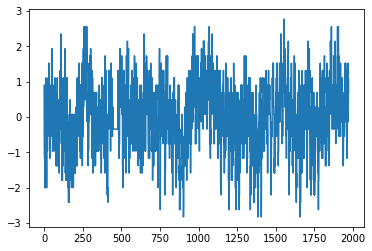

In [ ]:
plt.plot(df_x_std['TI203'])

In [ ]:
def cov_matrix(x):
  import numpy as np
  mean_vector = np.mean(x, axis = 0)
  cov_matrix = (x-mean_vector).T.dot(x-mean_vector)/(x.shape[0]-1)
  return cov_matrix,mean_vector
cov_matrix,mean_vector = cov_matrix(df_x_std)
df_cov_matrix = np.round(pd.DataFrame(cov_matrix),3)
#df_mean_vector = np.round(pd.DataFrame(mean_vector),1)
#print('Covariance Matrix \n{}'.format(df_cov_matrix))
#df_cov_matrix.to_excel("cov_matrix_pca.xlsx")
mean_vector.to_excel('mean_vector.xlsx')

In [ ]:
mean_vector

TI203      1.886410e-04
PI215     -8.113590e-06
PI216      7.071197e-17
PI218      6.592292e-06
MP-1101   -1.115619e-05
PI255A    -5.578093e-06
TI405     -1.521298e-06
TI401     -1.369168e-05
FT402     -1.115619e-05
T_wbulb    4.563895e-06
dtype: float64

In [ ]:
def eigen_decomposition(x):
  eig_vals, eig_vecs = np.linalg.eig(x)
  return eig_vals, eig_vecs
eig_vals, eig_vecs = eigen_decomposition(df_cov_matrix.values)
print('Eigenvectors \n {}'. format(eig_vecs))
print('\nEigenvalues \n {}'.format(eig_vals))


Eigenvectors 
 [[ 1.70494086e-01  4.26277952e-01  2.60512607e-02 -8.82141153e-01
   9.19983710e-02  3.66318974e-02 -8.20986352e-03  1.92752994e-02
   9.81151169e-03 -5.13716016e-03]
 [-3.79184667e-01  1.73662834e-01 -6.60110341e-02  3.73877068e-02
   1.64172897e-01 -1.66150471e-01 -7.03614639e-01  5.12835358e-01
   8.18209365e-02  3.12707767e-02]
 [-3.78844795e-01  1.79337837e-01 -6.51221959e-02  2.54853078e-02
   1.55058353e-01 -1.78969878e-01  7.10255029e-01  5.01604428e-01
   8.46377119e-02  1.08673128e-02]
 [-3.74065521e-01  1.82036479e-01 -6.85165539e-02  9.13229842e-03
   1.63151390e-01 -2.08498256e-01  3.03593982e-03 -5.40177273e-01
   2.39051342e-01  6.34920187e-01]
 [-2.14209706e-01  6.68632259e-01 -2.04637740e-01  2.77254846e-01
  -1.45978912e-01  4.97459160e-01 -1.75500493e-03 -1.92420278e-01
  -1.07897394e-01 -2.66180953e-01]
 [-3.70485198e-01 -1.54120129e-01  3.60113618e-02 -1.27683961e-01
   3.12226897e-01 -2.83049553e-01 -1.42484037e-02 -3.87879413e-01
   7.18943518e-02 

In [ ]:
def sort_eigen(eig_val,eig_vec):
  # Make a list of (eigenvalue, eigenvector) tuples
  eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
  # Sort the (eigenvalue, eigenvector) tuples from high to low
  eig_pairs.sort(key=lambda x: x[0], reverse=True)
  return eig_pairs
eig_pairs = sort_eigen(eig_vals,eig_vecs)
print('\nEigenvalues in descending order:')
for i in eig_pairs:
  print(i[0])
print('\nEigenvector in descending order:')
for i in eig_pairs:
  print(i[1])


Eigenvalues in descending order:
6.5553410936014735
1.2287295339662194
0.9998030316148554
0.751118267282388
0.2074988155226523
0.1680966391009328
0.04452832819146166
0.032733348912254705
0.01925731540079692
0.0008936264069659264

Eigenvector in descending order:
[ 0.17049409 -0.37918467 -0.3788448  -0.37406552 -0.21420971 -0.3704852
 -0.37548281 -0.34680128 -0.00045678 -0.31511681]
[ 0.42627795  0.17366283  0.17933784  0.18203648  0.66863226 -0.15412013
 -0.12971457 -0.11802153  0.24868364 -0.39925978]
[ 0.02605126 -0.06601103 -0.0651222  -0.06851655 -0.20463774  0.03601136
  0.06369649  0.1476346   0.95124403  0.11016628]
[-0.88214115  0.03738771  0.02548531  0.0091323   0.27725485 -0.12768396
 -0.16407254 -0.20095296  0.15731221 -0.18567117]
[ 0.09199837  0.1641729   0.15505835  0.16315139 -0.14597891  0.3122269
 -0.16482775 -0.81801781  0.09117193  0.30082049]
[ 0.0366319  -0.16615047 -0.17896988 -0.20849826  0.49745916 -0.28304955
 -0.04835013 -0.01567991 -0.00348111  0.75191223]


In [ ]:
def pca_loadings(eigpairs,input):
  data =  []
  for i in eigpairs:
    data.append(i[1])
  a = pd.DataFrame(data).T
  a.columns = [''.join(['PC',f'{i+1}']) for i in range (a.shape[1])] 
  a.index = input.drop('SSC_gros',axis = 1).columns
  return a
loadings = np.round(pca_loadings(eig_pairs,df),3)
loadings.to_excel('loading_factor.xlsx')
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
TI203,0.170,0.426,0.026,-0.882,0.092,0.037,-0.005,0.010,0.019,-0.008
PI215,-0.379,0.174,-0.066,0.037,0.164,-0.166,0.031,0.082,0.513,-0.704
PI216,-0.379,0.179,-0.065,0.025,0.155,-0.179,0.011,0.085,0.502,0.710
PI218,-0.374,0.182,-0.069,0.009,0.163,-0.208,0.635,0.239,-0.540,0.003
MP-1101,-0.214,0.669,-0.205,0.277,-0.146,0.497,-0.266,-0.108,-0.192,-0.002
PI255A,-0.370,-0.154,0.036,-0.128,0.312,-0.283,-0.699,0.072,-0.388,-0.014
TI405,-0.375,-0.130,0.064,-0.164,-0.165,-0.048,0.142,-0.872,-0.045,0.001
TI401,-0.347,-0.118,0.148,-0.201,-0.818,-0.016,-0.073,0.359,0.010,-0.008
FT402,-0.000,0.249,0.951,0.157,0.091,-0.003,0.007,-0.013,-0.002,0.000
T_wbulb,-0.315,-0.399,0.110,-0.186,0.301,0.752,0.107,0.154,0.061,0.011


In [ ]:
loading_PC2 = np.sum(np.square(loadings.PC4.values))
loading_PC2

0.999654

In [ ]:
def pca_variance(eigpairs):
  list_var = []
  for i in eigpairs:
    list_var.append(i[0])
    eig_val = pd.DataFrame(list_var).T
    eig_val.columns = [''.join(['PC',f'{i+1}']) for i in range (eig_val.shape[1])]
  list_var_ratio = []
  for i in eig_val.values:
    list_var_ratio.append((i/np.sum(eig_val.values))*100)     
    eig_val_ratio = pd.DataFrame(list_var_ratio)  
    eig_val_ratio.columns = [''.join(['PC',f'{i+1}']) for i in range (eig_val_ratio.shape[1])]
  return np.round(eig_val,3),eig_val_ratio 
sorted_variance,sorted_exp_variance= pca_variance(eig_pairs)
sorted_variance.to_excel('sorted_variance.xlsx')
sorted_exp_variance.to_excel('sorted_exp_variance.xlsx')

Calculate the contribution : Use only the first 4 principal components which retain 99

In [ ]:
def contribution(x):
  #for i in x.index:
  c = np.abs(x.drop(x.columns[6:10],axis = 1))
  c = c.sum(axis = 1)  
   # return c.append(i)
  contribution = pd.DataFrame(c).reset_index().rename(columns={'index':'Variable',0:'Contribution'})
  contribution_ratio = []
  for i in contribution['Contribution']:
    contribution_ratio.append((i/np.sum(contribution['Contribution'].values))*100)
  contribution_ratio = pd.DataFrame(contribution_ratio).reset_index().rename(columns={'index':'Variable',0:'Contribution Ratio'})
  contribution_ratio['Variable'] = contribution['Variable'].values
  contribution = contribution.sort_values(by = 'Contribution', ascending=False)
  contribution_ratio = contribution_ratio.sort_values(by = 'Contribution Ratio', ascending=False)
  return contribution,contribution_ratio 
contribution,contribution_ratio = contribution(loadings)
contribution_ratio.to_excel('contribution_ratio.xlsx')

Loadings=Eigenvectors⋅√Eigenvalues

**PCA Intrepretation**


In [ ]:
#matrix_w = matrix_w
matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1),
                      eig_pairs[1][1].reshape(10,1)))

print(matrix_w)

[[ 1.70494086e-01  4.26277952e-01]
 [-3.79184667e-01  1.73662834e-01]
 [-3.78844795e-01  1.79337837e-01]
 [-3.74065521e-01  1.82036479e-01]
 [-2.14209706e-01  6.68632259e-01]
 [-3.70485198e-01 -1.54120129e-01]
 [-3.75482813e-01 -1.29714570e-01]
 [-3.46801281e-01 -1.18021529e-01]
 [-4.56776004e-04  2.48683641e-01]
 [-3.15116809e-01 -3.99259779e-01]]


In [ ]:
#Projected Data
x_new = x_std.dot(matrix_w)
x_new = pd.DataFrame(data = x_new, columns=('PC1','PC2'))
x_new

,PC1,PC2
0,3.719881,-0.778242
1,2.252816,-0.883344
2,2.152171,-0.813764
3,2.258288,-0.780249
4,2.277635,-0.598340
...,...,...
1967,0.681327,1.275505
1968,1.297219,1.217941
1969,1.380462,1.034485
1970,1.929450,1.599799


In [ ]:
loadings['PC1'].index

Index(['TI203', 'PI215', 'PI216', 'PI218', 'MP-1101', 'PI255A', 'TI405',
       'TI401', 'FT402', 'T_wbulb'],
      dtype='object')

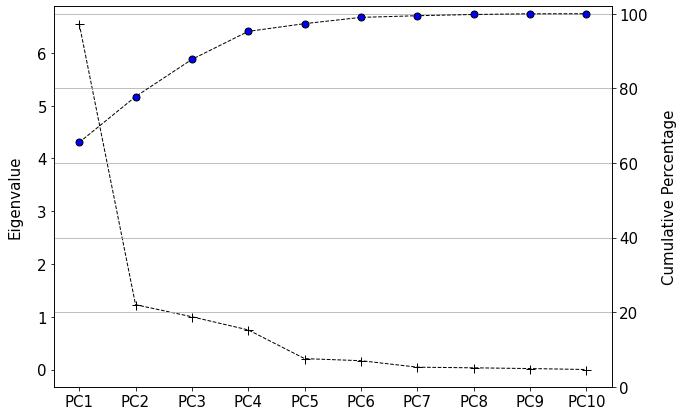

array([ 65.50101013,  77.77848349,  87.76852177,  95.2737003 ,
        97.3470298 ,  99.02665249,  99.47157983,  99.79865166,
        99.99107088, 100.        ])

In [ ]:
def biplots(x,y):
    #x = variance
    #y = variance_ratio
    subject = y.columns
    x = x.values.T
    y = y.values
    cumulated_var_ratio = []
    #series = pd.Series(y)
    cumsum = y.cumsum()
    cumulated_var_ratio.append(cumsum)
    cumulated_var_ratio = cumulated_var_ratio[0]
    index = np.arange(len(x))
    #indexy = 
    fig,ax = plt.subplots(figsize=(10,7))
    ax.plot(x,color='black', marker='+', linestyle='dashed',linewidth=1, markersize=9, markerfacecolor = 'red')
    ax2 = ax.twinx()
    ax2.plot(cumulated_var_ratio,color='black', marker='o', linestyle='dashed',linewidth=1, markersize=7, markerfacecolor = 'blue')
    ax2.set_ylim(0,102)
    plt.xticks(index,subject,fontsize = 15)
    #ax.set_xticks(index,subject,labelsize = 15)
    ax.tick_params(labelsize=15)
    plt.yticks(fontsize=15)
    ax.set_ylabel('Eigenvalue', fontsize = 15, labelpad = 15)
    ax2.set_ylabel('Cumulative Percentage', fontsize = 15, labelpad = 15)
    plt.grid()
    plt.show()
    return cumulated_var_ratio
biplots(sorted_variance,sorted_exp_variance)


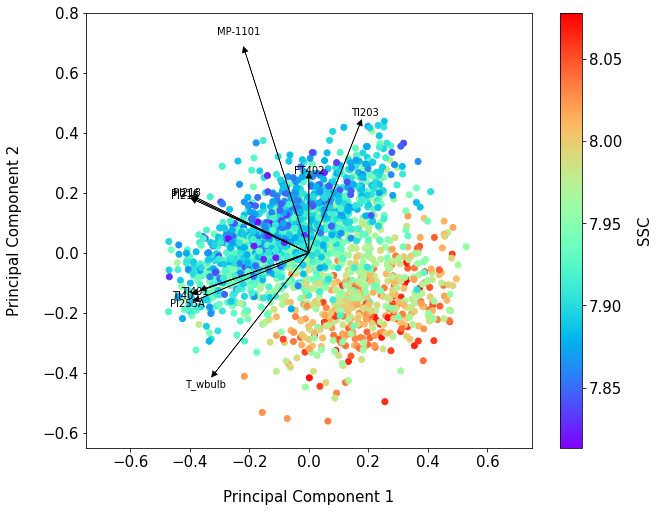

In [ ]:
## Create Biplot
def biplot(DataInputs, reduced_data, DataOutputs, loading):
  fig, ax = plt.subplots(figsize=(10,8))
  # scatterplot reduced data
  scalex = 1/(reduced_data.loc[:,'PC1'].max()-reduced_data.loc[:,'PC1'].min())
  scaley = 1/(reduced_data.loc[:,'PC2'].max()-reduced_data.loc[:,'PC2'].min())
  plt.scatter(x=reduced_data.loc[:,'PC1']*scalex, y = reduced_data.loc[:,'PC2']*scaley, c = DataOutputs, cmap='rainbow')
  feature_vector = loading.loc[:,'PC1':'PC2'].values
  # use scaling factor 
  arrow_size, text_pos = 0.4,1.1
  #projection of the original feature
  for i,v in enumerate(feature_vector):
    #plt.arrow(0,0,arrow_size*v[0], arrow_size*v[1], head_width = 0.02, head_length = 0.02, linewidth = 0.5, color = 'black')
    plt.arrow(0,0,v[0],v[1], head_width = 0.02, head_length = 0.02, linewidth = 0.5, color = 'black')
    plt.text(v[0]*text_pos, v[1]*text_pos, DataInputs.columns[i], color = 'black', ha = 'center', va = 'center', fontsize = 10)
  cbar = plt.colorbar()
  cbar.ax.tick_params(labelsize=15)  
  cbar.set_label('SSC', fontsize = 15, labelpad = 15)
  ax.set_xlabel('Principal Component 1', fontsize=15, labelpad = 20)
  ax.set_ylabel('Principal Component 2', fontsize = 15, labelpad = 20)
  ax.set_ylim(-0.65,0.8)
  ax.set_xlim(-0.75,0.75)
  ax.tick_params(labelsize = 15)
  #ax.yticks(fontsize = 15)
  plt.show()

biplot(df.loc[:,'TI203':'T_wbulb'],x_new,y,loadings)

Pearson correlation coefficient

In [ ]:
df.head()

,TI203,PI215,PI216,PI218,MP-1101,PI255A,TI405,TI401,FT402,T_wbulb,SSC_gros
0,180.481644,8.881836,8.850586,9.065430,56.963112,0.148376,51.177979,27.636719,7362.840820,16.244543,8.068487
1,180.359772,8.923828,8.884766,9.096680,57.243774,0.150208,51.239014,27.783203,6879.880859,16.138443,8.034688
2,180.329300,8.931641,8.893555,9.090820,57.185303,0.149597,51.330566,27.795410,7206.157715,16.232552,8.036983
3,180.329300,8.920898,8.887695,9.096680,57.196999,0.149414,51.312256,27.783203,7182.403320,16.131260,8.032251
4,180.329300,8.928711,8.891602,9.088867,57.196999,0.149658,51.232910,27.734375,7300.821777,16.166405,8.048654


In [ ]:
pearson = pd.DataFrame(df.corr())

In [ ]:
pearson.to_excel('pearson.xlsx')

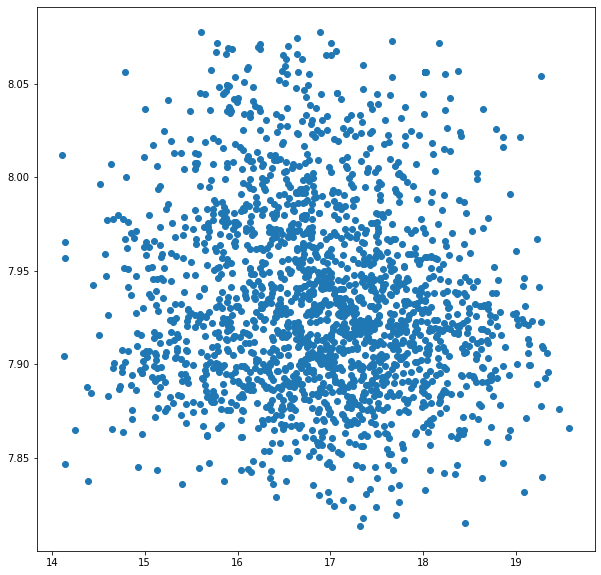

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df.T_wbulb,df.SSC_gros)

In [ ]:
df.corr()

,TI203,PI215,PI216,PI218,MP-1101,PI255A,TI405,TI401,FT402,T_wbulb,SSC_gros
TI203,1.000000,-0.356575,-0.345821,-0.328587,-0.077605,-0.405053,-0.380620,-0.327778,0.051470,-0.424865,-0.120381
PI215,-0.356575,1.000000,0.999170,0.980390,0.674917,0.895886,0.889720,0.794319,-0.001102,0.675967,-0.541348
PI216,-0.345821,0.999170,1.000000,0.980309,0.676041,0.895083,0.889439,0.796701,0.000385,0.671961,-0.550857
PI218,-0.328587,0.980390,0.980309,1.000000,0.662052,0.876031,0.879449,0.785882,-0.003648,0.661403,-0.544259
MP-1101,-0.077605,0.674917,0.676041,0.662052,1.000000,0.335674,0.375413,0.340655,0.040326,0.104778,-0.717104
PI255A,-0.405053,0.895886,0.895083,0.876031,0.335674,1.000000,0.939874,0.839500,-0.021414,0.842181,-0.305175
TI405,-0.380620,0.889720,0.889439,0.879449,0.375413,0.939874,1.000000,0.923842,0.000502,0.848319,-0.411134
TI401,-0.327778,0.794319,0.796701,0.785882,0.340655,0.839500,0.923842,1.000000,0.066063,0.766201,-0.464580
FT402,0.051470,-0.001102,0.000385,-0.003648,0.040326,-0.021414,0.000502,0.066063,1.000000,-0.033366,-0.111323
T_wbulb,-0.424865,0.675967,0.671961,0.661403,0.104778,0.842181,0.848319,0.766201,-0.033366,1.000000,-0.058858


Done......

In [ ]:
t_wbulb = df.T_wbulb
ssc = df.SSC_gros

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4)
t_wbulb_poly=poly.fit_transform(t_wbulb.values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_ssc = PolynomialFeatures(4)
ssc_poly=poly_ssc.fit_transform(ssc.values.reshape(-1,1))

In [ ]:
df_t_wbulb = pd.DataFrame(data = t_wbulb_poly)
df_ssc = pd.DataFrame(data = ssc_poly)
#df_poly.merge(pd.DataFrame(data=ssc_poly, columns='ssc'))
#df_poly.corr()
var_x = pd.DataFrame(df_t_wbulb[df_t_wbulb.columns[3]])
var_y = pd.DataFrame(df_ssc[df_ssc.columns[1]])

df_poly = pd.concat([var_x,var_y], axis=1)

In [ ]:
df_poly

In [ ]:
df_poly.corr()

In [ ]:
plt.plot(df_poly[df_poly.columns[4]])

In [ ]:
plt.plot(df_poly[df_poly.columns[1]])